
<h1 style="text-align: center;">Trabajo Práctico Nº 3</h1>

In [52]:
import cv2
import matplotlib.pyplot as plt
import os 
import numpy as np
from skimage import data, util, img_as_float
from skimage.util import random_noise
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle

# Ejercicio 1

 ### a) Para el siguiente ejericio se eligió una imagen satelital de Rada Tilly - Chubut, conseguida a traves de Google Maps.

In [53]:
# Leer la imagen en color
imagen = cv2.imread('rada_tilly.jpeg')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)


# Verificar si la imagen se ha cargado correctamente
if imagen is None:
    print("Error al cargar la imagen.")
    exit()

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')
plt.show()

### Umbralización manual

In [54]:

# Cargar imagen en escala de grises
imagen_1 = cv2.imread('rada_tilly.jpeg', cv2.IMREAD_GRAYSCALE)

# Verificación básica
if imagen_1 is None:
    raise ValueError("La imagen no se pudo cargar. Verificá el path o el nombre del archivo.")

# Defino el umbral manualmente
umbral = 137

# Crear una copia vacía de la imagen (misma forma)
umbralizada = np.zeros_like(imagen_1)

# Aplicar umbral 
for i in range(imagen_1.shape[0]):
    for j in range(imagen_1.shape[1]):
        if imagen_1[i, j] > umbral:
            umbralizada[i, j] = 255
        else:
            umbralizada[i, j] = 0

# Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_1, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(umbralizada, cmap='gray')
plt.title(f"Umbralización Global (t={umbral})")
plt.axis('off')
plt.show()


En este apartado se realizó una umbralización seleccionando el valor del umbral de forma manual (137), sin aplicar ningún criterio óptimo. El valor elegido fue arbitrario, a modo de prueba. Para ello, se implementó un algoritmo que recorre cada píxel de la imagen (ya convertida a escala de grises) y asigna el valor 255 si el píxel es mayor al umbral seleccionado, o 0 en caso contrario. De esta manera, se genera una imagen binaria compuesta únicamente por píxeles blancos y negros.


### Umbralización global
A continuacion lo que se intenta encontrar es el umbral optimo de la imagen utilizada. Para ello se implementaria el siguiente algortimo:
1) Inicialización:
   Se selecciona un valor inicial de umbral T (por ejemplo, 137 el utilizado en el apartado anterior ), dentro del rango 0–255. 
   También se define delta_T, que representa el cambio mínimo permitido entre iteraciones para considerar que el proceso ha convergido.

2) Iteración hasta la convergencia:
   Mientras la diferencia entre el nuevo umbral T y el valor anterior (T_prev) sea mayor o igual a delta_T, 
   se repiten los pasos siguientes.

3) Clasificación de los píxeles:
   - G1: píxeles con intensidad mayor que T.
   - G2: píxeles con intensidad menor o igual que T.

4) Cálculo de las medias:
   Se calcula la media de intensidad de cada grupo. 
   Si alguno de los grupos está vacío, se le asigna 0 como valor medio para evitar errores.

5) Actualización del umbral:
   El nuevo valor de T se define como el promedio entre las dos medias m1 (de G1) y m2 (de G2).

6) Aplicación del umbral final:
   Cuando el cambio entre iteraciones es menor que delta_T, se considera que el umbral ha convergido. 
   Se aplica ese valor a la imagen para obtener una versión binaria en blanco y negro.


Umbral final después de la convergencia: 119
Umbral calculado por Global: 119.0


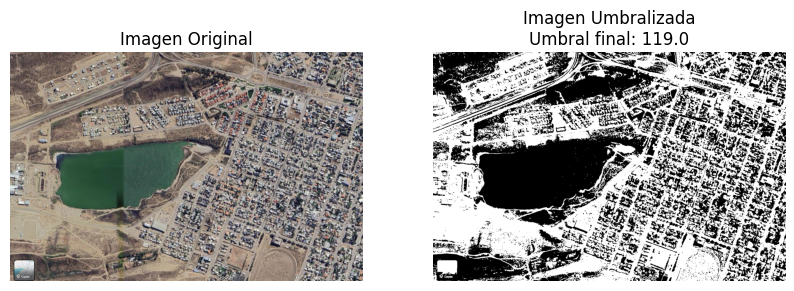

In [55]:
# Cargar la imagen en escala de grises

imagen = cv2.imread('rada_tilly.jpeg', cv2.IMREAD_GRAYSCALE)


# Paso 1: Seleccionar un umbral inicial
T = 137  # Umbral inicial 
delta_T = 1  # Diferencia mínima entre valores de T sucesivos
T_prev = 0  # Para almacenar el umbral anterior y verificar la convergencia

while abs(T - T_prev) >= delta_T:
    T_prev = T

    # Paso 2: Umbralizar la imagen usando T
    G1 = imagen[imagen > T]  # Grupo de píxeles con intensidad mayor a T
    G2 = imagen[imagen <= T] # Grupo de píxeles con intensidad menor o igual a T

    # Paso 4: Calcular m1 y m2
    if len(G1) > 0:
        m1 = np.mean(G1)
    else:
        m1 = 0

    if len(G2) > 0:
        m2 = np.mean(G2)
    else:
        m2 = 0

    # Paso 5: Actualizar el umbral T
    T = int((m1 + m2) / 2)

# Imprimir el valor final de umbral
print(f"Umbral final después de la convergencia: {T}")

# Aplicar el umbral final a la imagen
umbral_valor, thresholded_image = cv2.threshold(imagen, T, 255, cv2.THRESH_BINARY)

# Imprimir el valor de umbral calculado por Global
print(f"Umbral calculado por Global: {umbral_valor}")

# Visualizar la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))

# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen umbralizada
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title(f'Imagen Umbralizada\nUmbral final: {umbral_valor}')
plt.axis('off')

plt.show()

Se implementó el cálculo del umbral óptimo de forma manual utilizando un método iterativo basado en la media de dos grupos de píxeles (mayores y menores al umbral actual). Una vez obtenido el umbral final, se aplicó también el método cv2.threshold con ese mismo valor para verificar la consistencia. Ambos métodos produjeron el mismo valor del umbra (119).

### b) Método de umbralización de Otsu

In [56]:
# Cargar la imagen en escala de grises
image = cv2.imread('rada_tilly.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

Umbral calculado por Otsu: 119.0


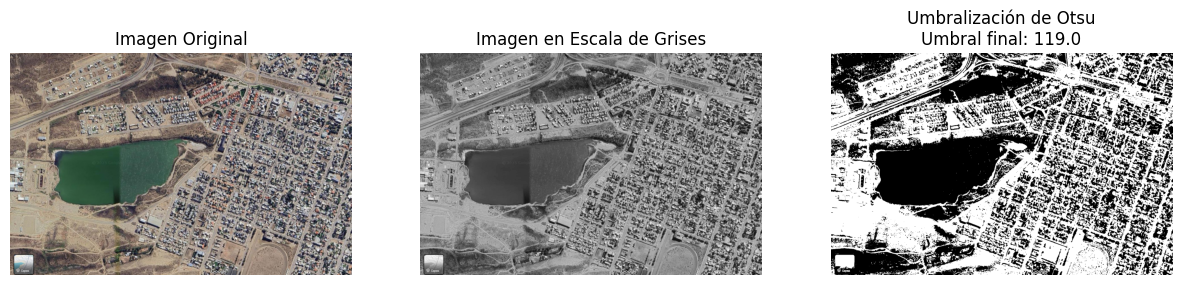

In [57]:
# Aplicar el método de umbralización de Otsu
umbral_valor, umbral_otsu = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Imprimir el valor de umbral calculado por Otsu
print(f"Umbral calculado por Otsu: {umbral_valor}")

# Mostrar la imagen original y la imagen umbralizada
plt.figure(figsize=(15, 5))

# Imagen en color original
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Imagen en escala de grises
plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Imagen en Escala de Grises")
plt.axis("off")

# Imagen umbralizada con Otsu
plt.subplot(1, 3, 3)
plt.imshow(umbral_otsu, cmap='gray')
plt.title(f"Umbralización de Otsu\nUmbral final: {umbral_valor}")
plt.axis("off")

plt.show()

Se aplicó el método de umbralización de Otsu, que determina automáticamente el valor de umbral óptimo analizando la distribución de niveles de gris de la imagen. Otsu evalúa todos los umbrales posibles (de 0 a 255) y selecciona aquel que maximiza la separación entre los dos grupos resultantes, es decir, aquel que genera la mayor varianza entre clases.

En este caso, el valor calculado por Otsu coincidió con el obtenido previamente mediante el método global iterativo, lo cual indica que ambos enfoques identificaron el mismo umbral como óptimo para binarizar esta imagen.


### c) Metodo de umbralización banda por banda.

In [59]:
image = cv2.imread('rada_tilly.jpeg')
imagen_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

**image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)**: Dado que queremos visualizar la imagen con Matplotlib, convertimos el formato de color de BGR a RGB usando `cv2.cvtColor`. Esto permite que la imagen aparezca con los colores correctos en el gráfico.

In [ ]:

# Separar las bandas de color
rojo, verde, azul = cv2.split(imagen_rgb)

# Aplicar umbralización de Otsu a cada banda
umbral_valor_r, rojo_binario = cv2.threshold(rojo, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
umbral_valor_g, verde_binario = cv2.threshold(verde, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
umbral_valor_b, azul_binario = cv2.threshold(azul, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Imprimir el valor de umbral calculado por Banda
print(f"Umbral calculado por Global: {umbral_valor_r}")
print(f"Umbral calculado por Global: {umbral_valor_g}")
print(f"Umbral calculado por Global: {umbral_valor_b}")

# Crear la imagen clasificada final combinando las bandas binarias
# Definimos reglas para clasificar en diferentes colores en base a las combinaciones binarias
imagen_banda_banda = np.zeros_like(imagen_rgb)

# Combinaciones de colores a partir de las bandas binarias
imagen_banda_banda[(rojo_binario == 255) & (verde_binario == 0) & (azul_binario == 0)] = [255, 0, 0]      # Rojo
imagen_banda_banda[(rojo_binario == 0) & (verde_binario == 255) & (azul_binario == 0)] = [0, 255, 0]      # Verde
imagen_banda_banda[(rojo_binario == 0) & (verde_binario == 0) & (azul_binario == 255)] = [0, 0, 255]      # Azul
imagen_banda_banda[(rojo_binario == 255) & (verde_binario == 255) & (azul_binario == 0)] = [255, 255, 0]  # Amarillo
imagen_banda_banda[(rojo_binario == 255) & (verde_binario == 0) & (azul_binario == 255)] = [255, 0, 255]  # Magenta
imagen_banda_banda[(rojo_binario == 0) & (verde_binario == 255) & (azul_binario == 255)] = [0, 255, 255]  # Cian
imagen_banda_banda[(rojo_binario == 255) & (verde_binario == 255) & (azul_binario == 255)] = [255, 255, 255]  # Blanco
imagen_banda_banda[(rojo_binario == 0) & (verde_binario == 0) & (azul_binario == 0)] = [0, 0, 0]           # Negro

# Mostrar la imagen original, las bandas binarias y la imagen clasificada final
plt.figure(figsize=(20, 10))

# Mostrar la imagen original en la primera posición (arriba)
plt.subplot(2, 3, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen clasificada final en la segunda posición (arriba)
plt.subplot(2, 3, 2)
plt.imshow(imagen_banda_banda)
plt.title(f'Imagen Banda por Banda\nUmbral final: r:{umbral_valor_r} g:{umbral_valor_g} b:{umbral_valor_b}')
plt.axis('off')

# Mostrar las bandas binarias en la fila inferior
plt.subplot(2, 3, 4)
plt.imshow(rojo_binario, cmap='gray')
plt.title('Banda Roja Binaria')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(verde_binario, cmap='gray')
plt.title('Banda Verde Binaria')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(azul_binario, cmap='gray')
plt.title('Banda Azul Binaria')
plt.axis('off')

plt.show()

Umbral calculado por Global: 119.0
Umbral calculado por Global: 119.0
Umbral calculado por Global: 113.0


### Que Hicimos?

#### 1. Separar de Bandas de Color

Se utiliza **cv2.split** para separar la imagen imagen_rgb en sus tres componentes de color: **rojo, verde y azul**. 

Esto produce tres matrices independientes, cada una conteniendo los valores de intensidad de su respectiva banda.

#### 2. Aplicar Umbralización

Se aplica la umbralización de Otsu a cada banda de color. `cv2.threshold` toma como argumentos:
La banda (rojo, verde o azul).
Un valor umbral inicial (0), aunque se recalcula automáticamente.
El valor máximo (255) para los píxeles que están por encima del umbral.

`cv2.THRESH_BINARY + cv2.THRESH_OTSU` especifica el uso de la umbralización binaria junto con el método de Otsu.

Este paso genera tres matrices binarias (rojo_binario, verde_binario y azul_binario), donde los píxeles son 255 (blanco) si superan el umbral de Otsu y 0 (negro) si no lo superan.

#### 3. Creae Matriz y Definir 8 Colores

Se inicializa una matriz imagen_banda_banda con las mismas dimensiones que imagen_rgb, pero llena de ceros. 

Esta matriz contendrá el resultado de la clasificación.

Se definen reglas para asignar colores en función de las combinaciones binarias de cada banda:
Si rojo_binario es blanco y los demás son negros, el píxel en imagen_banda_banda será rojo [255, 0, 0].
Se repite para todas las combinaciones de rojo, verde y azul, asignando colores como verde, azul, amarillo, magenta, cian, blanco y negro.


### Conclusión
Como resultado del proceso, los valores de umbral calculados automáticamente mediante el método de Otsu fueron: rojo = 119, verde = 119 y azul = 113.
Al observar las bandas binarias generadas, se puede notar que no existen grandes diferencias visuales entre ellas, lo cual indica que las tres bandas presentan una distribución de intensidades relativamente similar.

Por otro lado, al comparar esta clasificación en 8 colores con los métodos de umbralización utilizados en los puntos anteriores (umbral global e iterativo), no se observan diferencias significativas en la segmentación general de la imagen, lo que sugiere una buena consistencia entre las distintas técnicas aplicadas en este caso particular.

# Ejercicio 2

### Borde de Canny

En este punto vamos a aplicar el método de canny para los bordes en la imagen que estamos utilizando hasta el momento en el TP3, la imagen de Rada Tilly. Para ello, vamos realizar los siguientes tres pasos:

1- Suavizamiento y Diferenciación: Utilizamos cv2.GaussianBlur para reducir el ruido en la imagen. El tamaño del filtro y el valor de sigma determinan cuán sensible es el proceso al ruido.

2- Cálculo de la Dirección Perpendicular al Borde: Las derivadas Ix e Iy se obtienen usando el operador Sobel (cv2.Sobel). Luego, calculamos la magnitud del borde combinando estas derivadas con cv2.magnitude.

3- Cálculo del Ángulo del Gradiente: Utilizamos cv2.phase para calcular el ángulo del gradiente en cada píxel. Este ángulo indica la dirección perpendicular al borde en grados.